In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

In [2]:
def draw_sz(sz_top=3.5, sz_bot=1.5, ls='k-'):
  plt.plot([-0.708, 0.708], [sz_bot,sz_bot], ls)
  plt.plot([-0.708, -0.708], [sz_bot,sz_top], ls)
  plt.plot([0.708, 0.708], [sz_bot,sz_top], ls)
  plt.plot([-0.708, 0.708], [sz_top,sz_top], ls) 

def draw_home_plate(catcher_perspective=True, ls='k-'):
  if catcher_perspective:
    plt.plot([-0.708, 0.708], [0,0], ls)
    plt.plot([-0.708, -0.708], [0,-0.3], ls)
    plt.plot([0.708, 0.708], [0,-0.3], ls)
    plt.plot([-0.708, 0], [-0.3, -0.6], ls)
    plt.plot([0.708, 0], [-0.3, -0.6], ls)
  else: 
    plt.plot([-0.708, 0.708], [0,0], ls)
    plt.plot([-0.708, -0.708], [0,0.1], ls)
    plt.plot([0.708, 0.708], [0,0.1], ls)
    plt.plot([-0.708, 0], [0.1, 0.3], ls)
    plt.plot([0.708, 0], [0.1, 0.3], ls)

def draw_attack_zones():
  # outer heart / inner shadow
  plt.plot([-0.558, 0.558], [1.833,1.833], color=(227/255, 150/255, 255/255), ls='-', lw=3)
  plt.plot([-0.558, -0.558], [1.833,3.166], color=(227/255, 150/255, 255/255), ls='-', lw=3)
  plt.plot([0.558, 0.558], [1.833,3.166], color=(227/255, 150/255, 255/255), ls='-', lw=3)
  plt.plot([-0.558, 0.558], [3.166,3.166], color=(227/255, 150/255, 255/255), ls='-', lw=3) 

  # outer shadow /  inner chase 
  plt.plot([-1.108, 1.108], [1.166,1.166], color=(255/255, 197/255, 150/255), ls='-', lw=3)
  plt.plot([-1.108, -1.108], [1.166,3.833], color=(255/255, 197/255, 150/255), ls='-', lw=3)
  plt.plot([1.108, 1.108], [1.166,3.833], color=(255/255, 197/255, 150/255), ls='-', lw=3)
  plt.plot([-1.108, 1.108], [3.833,3.833], color=(255/255, 197/255, 150/255), ls='-', lw=3) 

  # outer chase 
  plt.plot([-1.666, 1.666], [0.5,0.5], color=(209/255, 209/255, 209/255), ls='-', lw=3)
  plt.plot([-1.666, -1.666], [0.5,4.5], color=(209/255, 209/255, 209/255), ls='-', lw=3)
  plt.plot([1.666, 1.666], [0.5,4.5], color=(209/255, 209/255, 209/255), ls='-', lw=3)
  plt.plot([-1.666, 1.666], [4.5,4.5], color=(209/255, 209/255, 209/255), ls='-', lw=3) 

import data 

In [3]:
csv_dir = '../SEC Trackman Data/'
all_files = [os.path.join(csv_dir, f) for f in os.listdir(csv_dir) if f.endswith('.csv')]

df_list = []

for file in all_files:
    df = pd.read_csv(file)
    df_list.append(df)

all_pitches = pd.concat(df_list, ignore_index=True)
fastballs = all_pitches[all_pitches['TaggedPitchType'].isin(['Fastball','Cutter','Sinker','FourSeamFastBall','TwoSeamFastBall','OneSeamFastBall'])]

In [4]:
off_speed = all_pitches[all_pitches['TaggedPitchType'].isin(['Changeup', 'Splitter'])]

Separate per pitcher

In [17]:
# Get unique values
unique_values = fastballs['Pitcher'].unique()

# Create a dictionary to store subsets
subsets = {value: fastballs[fastballs['Pitcher'] == value] for value in unique_values}

In [10]:
# Get unique values
unique_values = off_speed['Pitcher'].unique()

# Create a dictionary to store subsets
subsets_os = {value: off_speed[off_speed['Pitcher'] == value] for value in unique_values}

plot a specific pitcher's fastballs

In [31]:
t_bauman = subsets['Bauman, Tanner']

print(t_bauman.shape)

(789, 167)


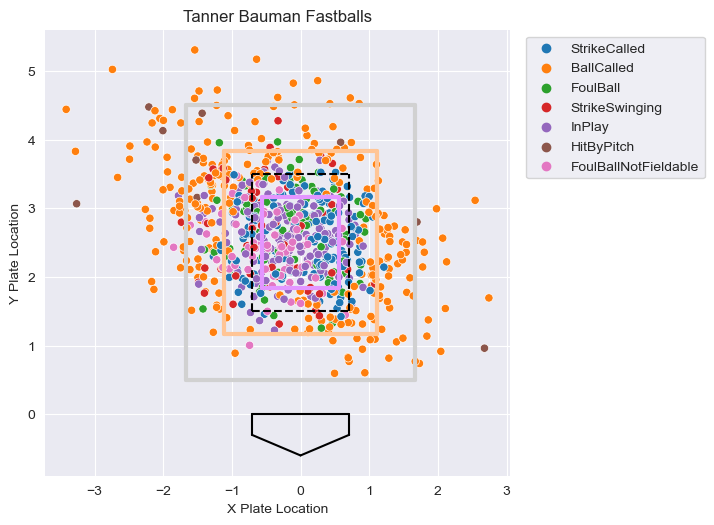

In [43]:
fig = plt.figure(figsize=(6,9))
fig = sns.scatterplot(data=t_bauman, x='PlateLocSide', y='PlateLocHeight', 
                      hue='PitchCall')

draw_sz(ls='k--')
draw_home_plate()
draw_attack_zones()
fig.set_aspect('equal')
plt.legend(bbox_to_anchor=(1.02,1), loc=2)
sns.despine(left=True, bottom=True)
plt.title('Tanner Bauman Fastballs')
plt.xlabel('X Plate Location')
plt.ylabel('Y Plate Location')
plt.show()

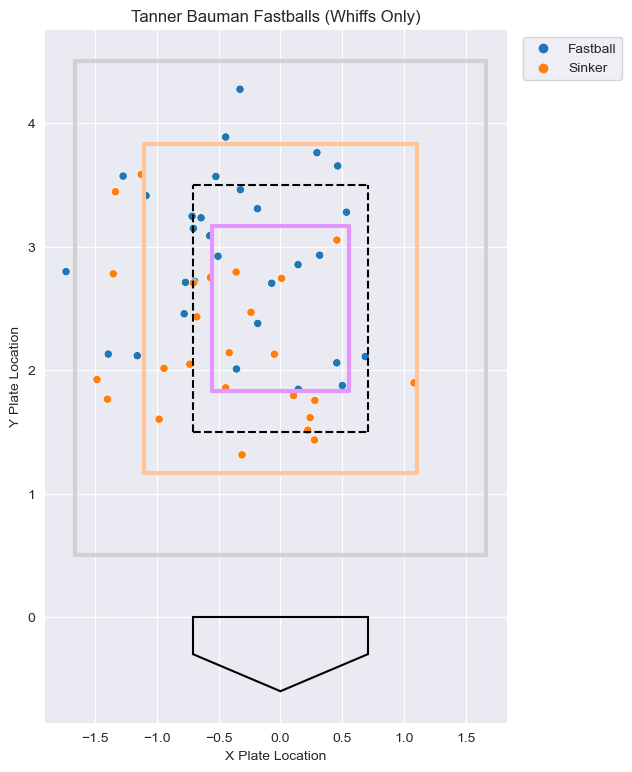

In [42]:
fig = plt.figure(figsize=(6,9))
fig = sns.scatterplot(data=t_bauman[t_bauman['PitchCall'] == 'StrikeSwinging'], x='PlateLocSide', y='PlateLocHeight',
                      hue='TaggedPitchType')

draw_sz(ls='k--')
draw_home_plate()
draw_attack_zones()
fig.set_aspect('equal')
plt.legend(bbox_to_anchor=(1.02,1), loc=2)
sns.despine(left=True, bottom=True)
plt.title('Tanner Bauman Fastballs (Whiffs Only)')
plt.xlabel('X Plate Location')
plt.ylabel('Y Plate Location')
plt.show()

In [11]:
c_allsup = subsets_os['Allsup, Chase']

print(c_allsup.shape)

(4, 167)


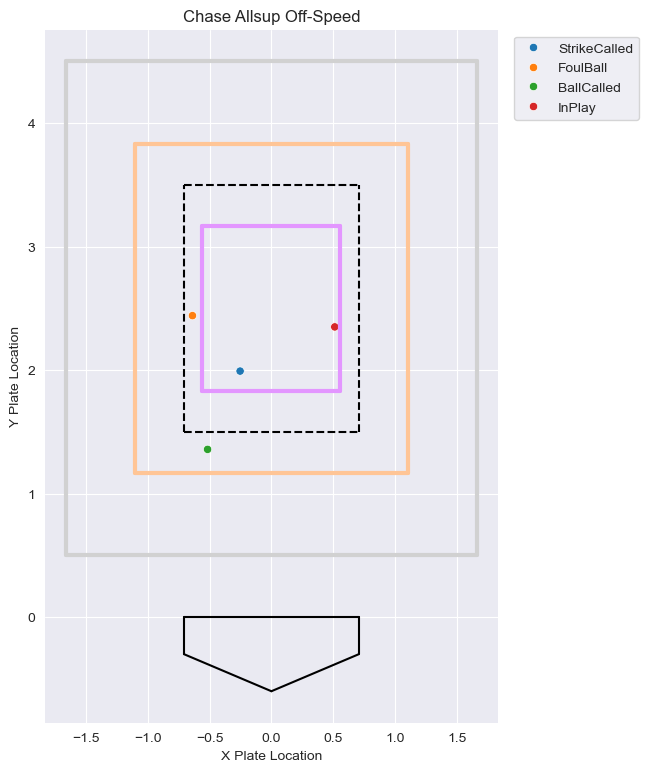

In [12]:
fig = plt.figure(figsize=(6,9))
fig = sns.scatterplot(data=c_allsup, x='PlateLocSide', y='PlateLocHeight', 
                      hue='PitchCall')

draw_sz(ls='k--')
draw_home_plate()
draw_attack_zones()
fig.set_aspect('equal')
plt.legend(bbox_to_anchor=(1.02,1), loc=2)
sns.despine(left=True, bottom=True)
plt.title('Chase Allsup Off-Speed')
plt.xlabel('X Plate Location')
plt.ylabel('Y Plate Location')
plt.show()